 <p style="text-align: center;"><b><font size=5>CAR ACCIDENT SERVERITY PROBLEM</font></b></p>

### Introduction/Business Problem

   In Our Day today life, we may not experience things that happen suddenly always but things are still happening around which we don’t have control over. One of such incidents is Car accidents and there are serval reasons for that to occur. There are cases where lives are saved with immediate action and cannot be saved also. This project is done on regard to Prevent or reduce the such incidents. The project will work on different cases the accidents occur and provide a solution how it can be reduced after analyzing the reasons for the incidents

### Data Section


   In section, we are going to understand the data set we are going pick as samples. The data set will consist of inputs such as location, severity or no of accidents occurred, weather condition, road condition, period of the day and other optional inputs like road signal, traffic condition and cause of accident. These inputs will be processed and used for the analysis purpose.

   The severity will be numbered from 0-5 where 0 is least time accident occurred and 5 is the maximum value. The weather condition will be rainy or dry. Road condition will be normal, wet road or damaged. And finally the period of the day will be day, noon and night which also help us understand the cause of an accident. 


In [2]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plot
from sklearn import preprocessing
%matplotlib inline



df = pd.read_csv('C:\\Users\\Dummy\\Pictures\\py\\Data-Collisions.csv',dtype={'SPEEDING': "string"})
df.head()

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,<NA>,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,<NA>,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,<NA>,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,<NA>,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,<NA>,10,Entering at angle,0,0,N


Below command will tell us the number of columns and type of the column in the data set we have taken. 

In [3]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           string
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


Below command Value counts will give us the information of the unique count of severity code available in the data set.

In [5]:
idx=df['SEVERITYCODE']
idx.value_counts() 

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [5]:
df.groupby(['SEVERITYCODE'])['ADDRTYPE'].value_counts(normalize=True)

SEVERITYCODE  ADDRTYPE    
1             Block           0.718590
              Intersection    0.276445
              Alley           0.004965
2             Block           0.518923
              Intersection    0.479663
              Alley           0.001414
Name: ADDRTYPE, dtype: float64

### Methodology Section

#### K-Nearest Neighbor (KNN)

KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.

#### Decision Tree

A decision tree model gives us a layout of all possible outcomes so we can fully analyze the consequences of a decision. It context, the decision tree observes all possible outcomes of different weather conditions.

#### Logistic Regression

Because our dataset only provides us with two severity code outcomes, our model will only predict one of those two classes. This makes our data binary, which is perfect to use with logistic regression.

### Analysis Section

In [10]:
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



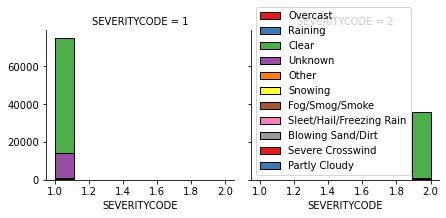

In [50]:
import seaborn as sns

bins = np.linspace(df.SEVERITYCODE.min(), df.SEVERITYCODE.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="WEATHER", palette="Set1", col_wrap=4)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [7]:
ds=df[{'ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND'}]
ds=ds.fillna(0)
ds.head()

,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND
0,Intersection,Wet,Overcast,Daylight
1,Block,Wet,Raining,Dark - Street Lights On
2,Block,Dry,Overcast,Daylight
3,Block,Dry,Clear,Daylight
4,Intersection,Wet,Raining,Daylight


In [8]:
ds['ADDRTYPE']=ds['ADDRTYPE'].replace(to_replace=['Intersection', 'Block', 'Alley'], value=[1,2,3])
ds['WEATHER']=ds['WEATHER'].replace(to_replace=['Overcast', 'Raining', 'Clear', 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt','Severe Crosswind', 'Partly Cloudy'], 
                                    value=[1,2,3,4,5,6,7,8,9,10,11])
ds['ROADCOND']=ds['ROADCOND'].replace(to_replace=['Wet', 'Dry', 'xx', 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], value=[1,2,3,4,5,6,7,8,9,10])
ds['LIGHTCOND']=ds['LIGHTCOND'].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights', 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'], value=[1,2,3,4,5,6,7,8,9])

In [9]:
ds.head()

,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND
0,1,1,1,1
1,2,1,2,2
2,2,2,1,1
3,2,2,3,1
4,1,1,2,1


In [10]:
mx=df[{'SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND'}].groupby(['SEVERITYCODE']).count()
mx

,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND
SEVERITYCODE,,,,
1,134750,132534,132488,132405
2,57997,57128,57104,57098


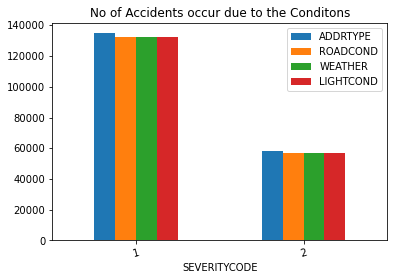

In [52]:
mx.plot.bar(rot=15, title="No of Accidents occur due to the Conditons");
plot.show();

In [8]:
!pip install folium

In [44]:
import folium as folium
SF_COORDINATES = (37.76, -122.45)

mapset = df[{'SEVERITYCODE','X','Y'}]
mapset = mapset.dropna()
mapset.head()
mapset1=mapset[0:100]

latmean=df['Y'].mean() 
lonmean=df['X'].mean() 
map1 = folium.Map(location=[latmean,lonmean], 
        zoom_start=12) 

def color(sev): 
    if sev == 1: 
         col = 'green'
    elif sev == 2: 
         col = 'red'
    return (col) 
for lat,lan,sev in zip(mapset1['Y'],mapset1['X'],mapset1['SEVERITYCODE']): 
    
    folium.Marker(location=[lat,lan], 
                  icon= folium.Icon(color=color(sev), 
                  icon_color='yellow',icon = 'cloud')).add_to(map1) 

map1


### Define X and y 

In [153]:
X = ds
X[0:5]

,ROADCOND,ADDRTYPE,LIGHTCOND,WEATHER
0,1,1,1,1
1,1,2,2,2
2,2,2,1,1
3,2,2,1,3
4,1,1,1,2


In [154]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

### Normalize Data

In [155]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.97503088, -1.28668708, -0.5419915 , -1.57025352],
       [-0.97503088,  0.69338623,  0.25809276, -0.57904747],
       [ 0.09367727,  0.69338623, -0.5419915 , -1.57025352],
       [ 0.09367727,  0.69338623, -0.5419915 ,  0.41215858],
       [-0.97503088, -1.28668708, -0.5419915 , -0.57904747]])

### Train/Test Split 

 We will use 20% of our data for testing and 80% for training.

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 4) (155738,)
Test set: (38935, 4) (38935,)


In [158]:
from sklearn.neighbors import KNeighborsClassifier
k=5
neighK5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighK5

yhat = neighK5.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighK5.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6890675365036151
Test set Accuracy:  0.6888917426480031


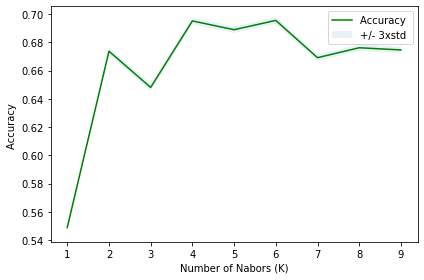

Best accuracy: 0.6954924874791318 k= 6


In [159]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustionMx = [];
for n in range(1,Ks):
    
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "Best accuracy:", mean_acc.max(), "k=", mean_acc.argmax()+1)

## Decision Tree

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [163]:
predTree = Tree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])


[1 1 1 1 1]
[1 1 1 2 1]


In [166]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Accuracy:  0.6993082428683949


### Logistic Regression

In [167]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LogR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LogR

Train set: (155738, 4) (155738,)
Test set: (38935, 4) (38935,)


LogisticRegression(C=0.01, solver='liblinear')

In [169]:
yhat = LogR.predict(X_test)
yhat
yhat_prob = LogR.predict_proba(X_test)
yhat_prob

array([[0.70107795, 0.29892205],
       [0.54871199, 0.45128801],
       [0.73218717, 0.26781283],
       ...,
       [0.7435953 , 0.2564047 ],
       [0.75984055, 0.24015945],
       [0.70107795, 0.29892205]])

In [171]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5874048132576434

### Results & Evaluation 

In [172]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [174]:
testdata=df[{'ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND'}]
testdata.head()

,ROADCOND,ADDRTYPE,LIGHTCOND,WEATHER
0,Wet,Intersection,Daylight,Overcast
1,Wet,Block,Dark - Street Lights On,Raining
2,Dry,Block,Daylight,Overcast
3,Dry,Block,Daylight,Clear
4,Wet,Intersection,Daylight,Raining


In [176]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
Y = df['SEVERITYCODE'].values
Y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

In [179]:
yhatKNN=neigh.predict(X)
KNNJaccard = jaccard_score(y, yhatKNN)
KNNF1 = f1_score(y, yhatKNN, average='weighted')
print("Avg F1-score: %.2f" % KNNF1 )
print("KNN Jaccard Score: %.2f" % KNNJaccard)


yhatDEC = Tree.predict(X)
DTJaccard = jaccard_score(y, yhatDEC)
DTF1 = f1_score(y, yhatDEC, average='weighted')
print("Avg F1-score: %.2f" % DTF1 )
print("Decision Tree Jaccard Score: %.2f" % DTJaccard)

yhatLOG = LogR.predict(X)
yhatLOGproba = LogR.predict_proba(X)
LogRJaccard = jaccard_score(y, yhatLOG)
LogRF1 = f1_score(y, yhatLOG, average='weighted')
Logloss = log_loss(y, yhatLOGproba)
print("LogLoss: : %.2f" % Logloss)
print("Avg F1-score: %.4f" % LogRF1)
print("LOG Jaccard score: %.4f" % LogRJaccard)

Avg F1-score: 0.60
KNN Jaccard Score: 0.64
Avg F1-score: 0.58
Decision Tree Jaccard Score: 0.70
LogLoss: : 0.59
Avg F1-score: 0.5805
LOG Jaccard score: 0.6939


#### KN Model is accurate at 6
#### Decision Tree is accurate depth 7
#### Logistic Regression is accurate at 6

## Discussion

In the beginning of this notebook, we had categorical data that was of type 'object'. This is not a data type that we could have fed through an algoritim, so label encoding was used to created new classes that were of type int8; a numerical data type.

After solving that issue we were presented with another - imbalanced data. As mentioned earlier, class 1 was nearly three times larger than class 2. The solution to this was downsampling the majority class with sklearn's resample tool. We downsampled to match the minority class exactly with 58188 values each.

Once we analyzed and cleaned the data, it was then fed through three ML models; K-Nearest Neighbor, Decision Tree and Logistic Regression. Although the first two are ideal for this project, logistic regression made most sense because of its binary nature.

Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. Choosing different k, max depth and hyparameter C values helped to improve our accuracy to be the best possible.

### Conclusion

Based on historical data from weather conditions pointing to certain classes, we can conclude that particular weather conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).